В этой работе вам предстоит исследовать неточности в данных и устранить их. В конце – проанализировать результаты.

Все необходимые этапы предобработки данных описаны в задании, ваша задача – реализовать их.

# Данные

[Monster.com jobs](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data) - датасет о вакансиях, данные в котором намеренно не предобработаны. Есть несколько сомнительных столбцов с 1 уникальным значением, тип работы не стандартизирован, расположение может содержать штат, город и почтовый индекс или только часть из этих данных, или совершенно неясные данные вроде "Contact name Tony Zerio" или "Sr. Process Engineer, Manufacturing", в графе с зарплатой помимо зарплаты есть вещи вроде "Excellent Pay and Incentives" и другие проблемы.

Практически все столбцы в датасете нельзя использовать для анализа без предобработки.

К датасету на kaggle приложен блокнот с примером его очистки. Рекомендуется ознакомиться с ним после выполнения задания, чтобы оценить сходства и различия в подходах.

Целью обработки датасета будем считать использование для многостороннего изучения данных в дальнейшем, то есть мы обработаем данные таким образом чтобы их удобно было использовать для широкого спекра задач анализа данных.

### Изучение датасета

In [262]:
# эти модули, вероятнее всего, понадобятся вам в работе
# если в процессе захотите использовать что-то еще, можно добавить
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
from itertools import chain, combinations

Загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [263]:
monster = pd.read_csv('monster_com-job_sample.csv')
monster.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.

(Таблицу можно представить в виде текстового поля, датафрейма или картинки – формат неважен, важно содержание)

|Столбец        |Тип данных|Описание проблемы                                                |
|---------------|----------|-----------------------------------------------------------------|
|country        |строка    |1 уникальное значение                                            |
|country_code   |строка    |1 уникальное значение                                            |
|date_added     |строка    |99.45% данных na. Диапазон дат - 1 год                           |
|has_expired    |строка    |1 уникальное значени(No)                                         |
|job_board      |строка    |1 уникальное значение                                            |
|job_description|строка    |Имеется 3256 дублируемых строк. Возможно это дублирующиеся записи|
|job_title      |строка    |                                                                 |
|job_type       |строка    |Различные форматы записи одинаковой информации                   |
|location       |строка    |Различные форматы записи одинаковой информации                   |
|organization   |строка    |31% данных na                                                    |
|page_url       |строка    |Данные неактуальны для анализа                                   |
|salary         |строка    |84% данных na. Различные форматы записи                          |
|sector         |строка    |24% данных nan. Могут быть различные виды записи одного сектора  |
|uniq_id        |строка    |Данные бесполезны для анализа                                    |

#### Пустые значения

Начнем работу: проанализируем пустые ячейки.
Выясните, в каких столбцах и в каком количестве отсутствуют данные.

> Помимо создания таблички, воспользуйтесь библиотекой `missingno` и визуально оцените количество пропущенных данных.

In [264]:
monster.notna().sum(axis=0)

country            22000
country_code       22000
date_added           122
has_expired        22000
job_board          22000
job_description    22000
job_title          22000
job_type           20372
location           22000
organization       15133
page_url           22000
salary              3446
sector             16806
uniq_id            22000
dtype: int64

<Axes: >

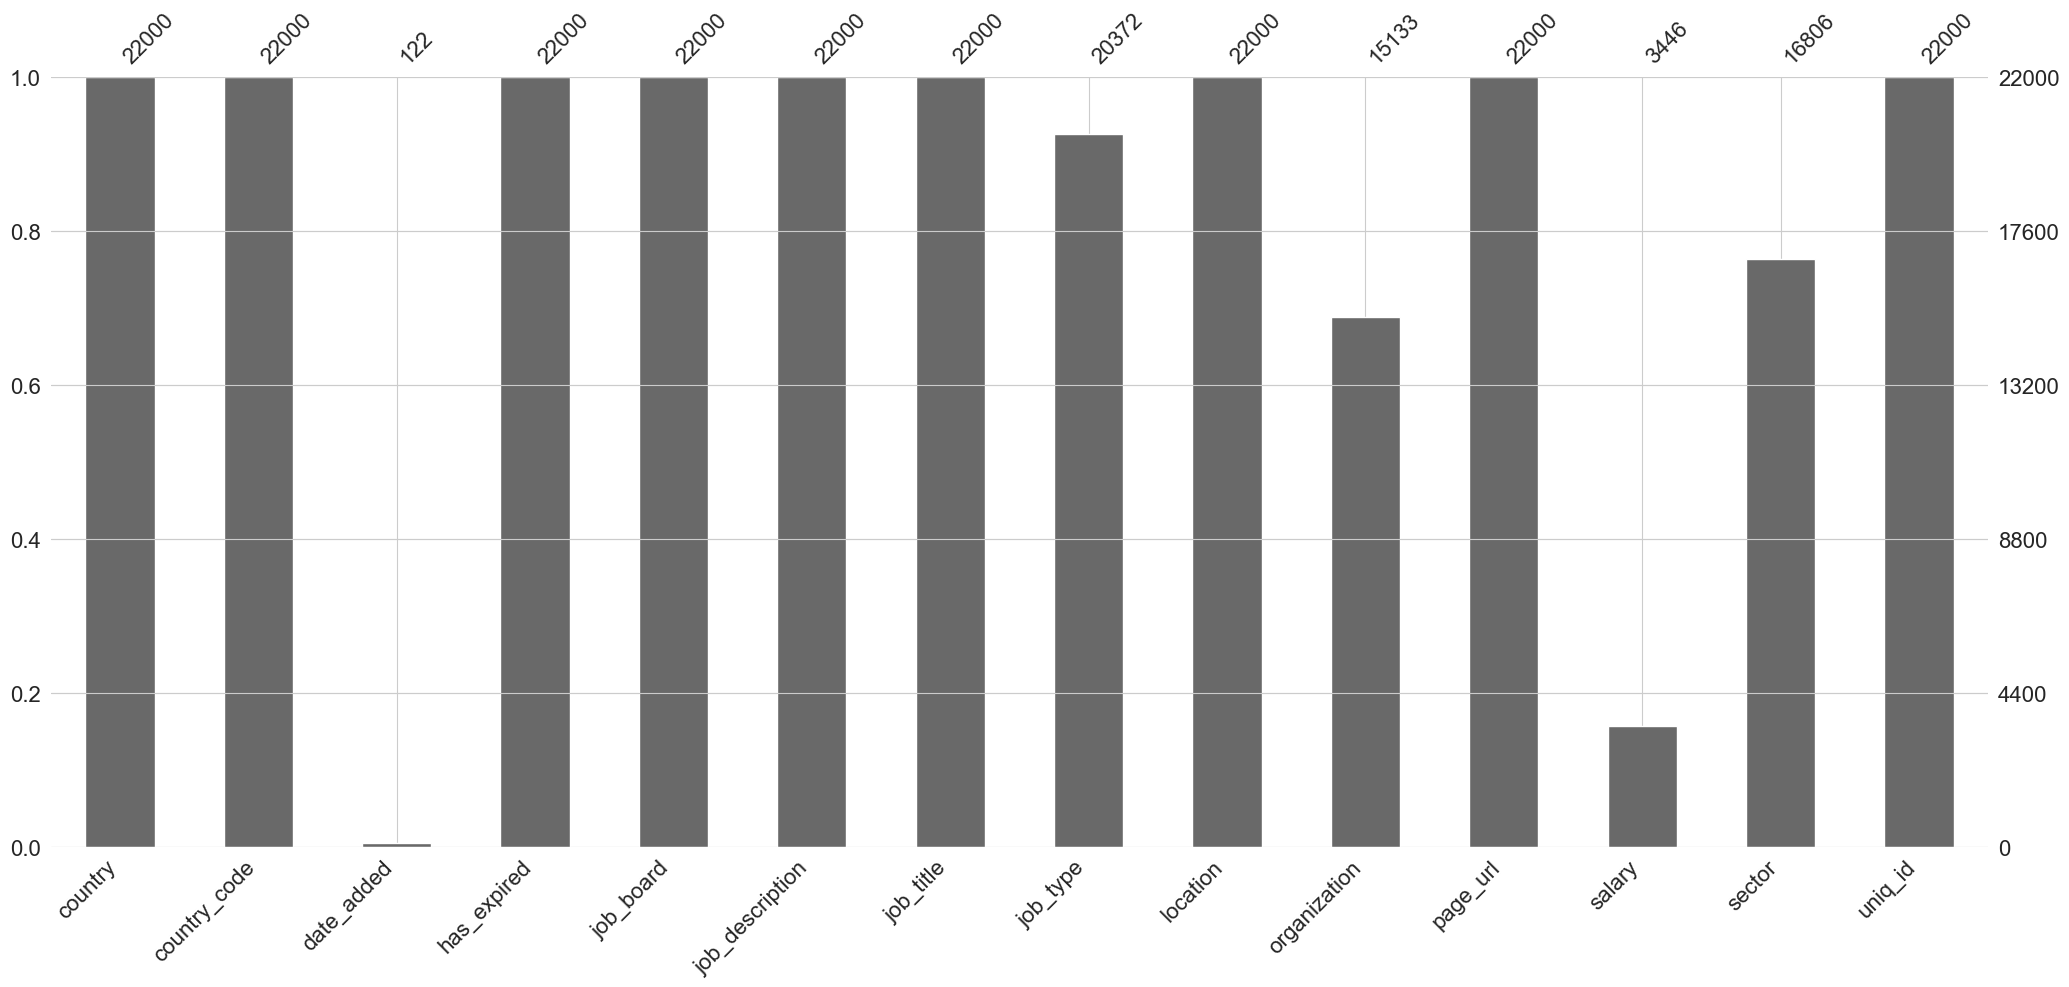

In [265]:
msno.bar(monster)

<Axes: ylabel='Count'>

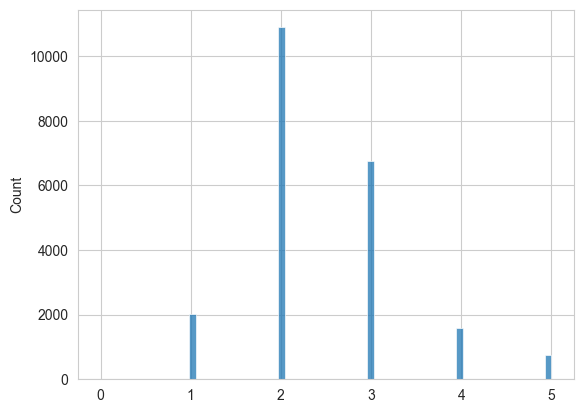

In [266]:
sns.histplot(monster.isna().sum(axis=1))

Проверьте, как изменится размер датасета, если мы примем решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [267]:
monster.dropna(axis=0)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
279,United States of America,US,6/10/2016,No,jobs.monster.com,"At American Family Insurance, we're firmly com...",Insurance Sales - Customer Service Job in Eden...,Full Time Employee,"Eden Prairie, MN 55344",Insurance,http://jobview.monster.com/insurance-sales-cus...,15.00 - 21.00 $ /hour,Accounting/Finance/Insurance,64a597e5dd17740aadf4b0e8047b51a5
7419,United States of America,US,4/27/2016,No,jobs.monster.com,A CUSTOMER SERVICE JOB … that might become a c...,Customer Service Representative Job in Las Vegas,Full Time Employee,"Las Vegas, NV 89129",Business Services - Other,http://jobview.local-jobs.monster.com/Customer...,$10.50+ /hour,Customer Support/Client Care,7baad80eae733c2518f0a500609c1e90
17048,United States of America,US,8/5/2016,No,jobs.monster.com,"At American Family Insurance, we're firmly com...",Licensed Insurance Sales Assistant (Customer S...,Full Time Employee,"Covington, GA",Insurance,http://jobview.monster.com/licensed-insurance-...,$10.50+ /hour,Sales/Retail/Business Development,c486cae7c4c1105a85e50448fb9c0dd0
17052,United States of America,US,8/2/2016,No,jobs.monster.com,"At American Family Insurance, we're firmly com...",Customer Service Agent / Insurance Sales Assis...,Full Time Employee,"Alpharetta, GA 30009",Insurance,http://jobview.monster.com/customer-service-ag...,11.00 - 15.00 $ /hour,Sales/Retail/Business Development,6ddfdf91eb991d9d31f3cd2ee4492eb9
18709,United States of America,US,3/11/2016,No,jobs.monster.com,There's No Place Like The Neighborhood!It's a ...,Restaurant Manager - Applebee's Parsippany,"Full Time, Employee","Parsippany, NJ 07054",Restaurant/Food Services,http://jobview.monster.com/Restaurant-Manager-...,50.00 - 65.00 $ /year,Food Services/Hospitality,4fb8c68e3b6efcec902801a96f2cb004


Вывод: остается только 5 строк. Удаление недопустимо

Принимаем решение сохранить как можно больше данных, удалять все – плохой план. Если удалить все, можем потерять важную информацию.

#### Нерелевантные колонки

Оценим, какие столбцы необходимо оставить, а какие можно удалить.
Рассмотрите следующие идеи:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли столбцы, в которых содержатся данные, которые есть еще в каком-то столбце?
3. Какие столбцы содержательно нерелевантны? Обоснуйте.

##### 1. Одно значение

Найдем столбцы с одним значением и их значение

In [268]:
one_value = monster.nunique() == 1
monster.loc[0, one_value]

country         United States of America
country_code                          US
has_expired                           No
job_board               jobs.monster.com
Name: 0, dtype: object

Можно использовать в качестве метаданных

##### 2. Данные, которые есть еще в каком-то столбце

In [269]:
monster[['job_title', 'location', 'job_description']]

,job_title,location,job_description
0,IT Support Technician Job in Madison,"Madison, WI 53702",TeamSoft is seeing an IT Support Specialist to...
1,Business Reporter/Editor Job in Madison,"Madison, WI 53708",The Wisconsin State Journal is seeking a flexi...
2,Johnson & Johnson Family of Companies Job Appl...,DePuy Synthes Companies is a member of Johnson...,Report this job About the Job DePuy Synthes Co...
3,Engineer - Quality Job in Dixon,"Dixon, CA",Why Join Altec? If you’re considering a career...
4,Shift Supervisor - Part-Time Job in Camphill,"Camphill, PA",Position ID# 76162 # Positions 1 State CT C...
...,...,...,...
21995,Assistant Vice President - Controller Job in C...,"Cincinnati, OH",This is a major premier Cincinnati based finan...
21996,Accountant Job in Cincinnati,"Cincinnati, OH 45236",Luxury homebuilder in Cincinnati seeking multi...
21997,AEM/CQ developer Job in Chicago,"Chicago, IL 60602",RE: Adobe AEM- Client - Loca...
21998,Electrician - Experienced Forging Electrician ...,"Chicago, IL 60609",Jernberg Industries was established in 1937 an...


`job_title` и `location`. В `job_title` можно найти город

По  `job_description` можно определить `job_title`. В `job_descrtiption` содержится информация о `job_title`

Иногда по `job_description` можно определить `organization`

По `job_title` можно определить `sector`

##### 3. Нерелевантные данные

In [270]:
monster['page_url']

0        http://jobview.monster.com/it-support-technici...
1        http://jobview.monster.com/business-reporter-e...
2        http://jobview.monster.com/senior-training-lea...
3        http://jobview.monster.com/engineer-quality-jo...
4        http://jobview.monster.com/shift-supervisor-pa...
                               ...                        
21995    http://jobview.monster.com/Assistant-Vice-Pres...
21996    http://jobview.monster.com/Accountant-Job-Cinc...
21997    http://jobview.monster.com/AEM-CQ5-developer-J...
21998    http://jobview.monster.com/Electrician-Experie...
21999    http://jobview.monster.com/Contract-Administra...
Name: page_url, Length: 22000, dtype: object

Нерелевантные столбцы:
`page_url` - Так как:
* Данные берутся с одного сайта как мы можем узнать из job_board
* Ссылка содержит только название вакансии, которая уже есть в `job_title`

`uniq_id` - Идентификатор на сайте бесполезен для анализа

#### Дублирование данных

Определите столбцы, по которым можно однозначно идентифицировать запись в датасете. Одинаковыми будем считать строки, в которых значения в этих столбцах совпадает.

Удалите одно из двух повторений и сравните, как изменились характеристики датасета.

Запись в датасете можно однозначно идентифицировать по:
* job_title
* location
* salary

Проблема: salary - na в 80% случаев. Часто будет возникать ситуация, что мы не знаем salary, а location и job_title совпадают.

Решение: посмотрим на данных, в которых salary не na насколько часто при одинаковом location и job_title строка дублируется


Посмотрим сколько дубликатов в not na:
* С учетом salary
* Без учета salary

Это позволит нам понять насколько часто дублируется job_title и location с различной salary

In [271]:
sum(monster['salary'].notna())

3446

In [272]:
salary_not_na = monster[monster['salary'].notna()]
salary_not_na

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
13,United States of America,US,NaN,No,jobs.monster.com,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,"Houston, TX 77098",Education,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,b43c077756d5a326c4854e1399fd2464
14,United States of America,US,NaN,No,jobs.monster.com,Construction Professional For more than 15 yea...,Superintendent Job in Houston,Full Time Employee,"Houston, TX",Construction - Industrial Facilities and Infra...,http://jobview.monster.com/Superintendent-Job-...,"80,000.00 - 95,000.00 $ /year",Building Construction/Skilled Trades,d8491fcefe14d1398de419984dccf427
19,United States of America,US,NaN,No,jobs.monster.com,"Competitive compensation package, excellent co...",Technician - Robot & Multi-Axis CNC Field Serv...,Full Time,"Carter Lake, IA 51510",NaN,http://jobview.monster.com/Technician-Robot-Mu...,"60,000.00 - 72,000.00 $ /year",Experienced (Non-Manager),3bef462fc38d743c7fbce17cf50ee7d5
23,United States of America,US,NaN,No,jobs.monster.com,"Well respected, rapidly growing, and expandin...",Estimator - Construction Job in Denver,Full Time,"Denver, CO 80215",NaN,http://jobview.monster.com/Estimator-Construct...,Excellent Pay and Incentives,NaN,c552f63b5497f720942aaf943d629b1c
29,United States of America,US,NaN,No,jobs.monster.com,Experis is working with a Pharmaceutical start...,Sr. Process Engineer,Full Time Employee,"Sr. Process Engineer, Manufacturing","Chicago, IL",http://jobview.monster.com/Sr-Process-Engineer...,"70,000.00 - 100,000.00 $ /year",Engineering,779bb4c9bf038b7fb775134736d36fd4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21987,United States of America,US,NaN,No,jobs.monster.com,Own Your TerritoryAsk yourself these questions...,Experienced Territory Sales,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/Experienced-Territo...,"$80,000.00+ /year",Experienced (Non-Manager),a696d26d6db9c5abe572117b9483e847
21995,United States of America,US,NaN,No,jobs.monster.com,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640
21996,United States of America,US,NaN,No,jobs.monster.com,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de
21998,United States of America,US,NaN,No,jobs.monster.com,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b


In [273]:
without_salary = sum(salary_not_na[['job_title', 'location']].duplicated())
with_salary = sum(salary_not_na[['job_title', 'location', 'salary']].duplicated())
with_salary / without_salary

0.801762114537445

Видим, что в 80% случаев, если job_title и location совпадают, то это дублирующиеся записи

Проблема: salary может быть записана в разных форматах, поэтому одинаковая зар.плата будет считаться различной при df.duplicate()

Решени: визуально просмотрим при совпадении job_title и location отличаются ли типы записи зар. платы

In [274]:
def larger_than_one(df):
    return df.shape[0] > 1

have_duplicates =salary_not_na.groupby(['job_title', 'location']).filter(larger_than_one)
have_duplicates.groupby(['job_title', 'location']).apply(lambda x: x['salary'])

job_title                                                       location                  
./hr Experienced RN supervisor (Smithtown) Job in Smithtown     Smithtown, NY 11787  3806             40.00 - 40.00 $ /year
                                                                                     19461            40.00 - 40.00 $ /year
Accounts Payable Job in Dallas                                  Dallas, TX 75206     17374    40,000.00 - 55,000.00 $ /year
                                                                                     17384    40,000.00 - 55,000.00 $ /year
Accounts Payable Specialist Job in Dallas                       DallasTX             5991              0.00 - 20.00 $ /hour
                                                                                                          ...              
open house monday // Job in Seminole                            Seminole, FL 33777   15453            11.41 - 12.95 $ /hour
st Time Manager: Entry Level Business Man

Из данных одинаковом job_title и location видно:
* тип записи зар.платы не отличается
* Если зар.плата иотличается, то буквально на 5-10%, что говорит в пользу удаления дубликатов, несмотря на большое количество nan в salary

Вывод: можем удалить дубликаты по признакам (job_title, location, salary), несмотра на большое количество nan в salary

### Обработка датасета

#### Первичная обработка

Выше мы оценили, какие есть проблемы с дубликатами и отсутствующими значениями.

Первым делом устраним их. Удалим все, что можно удалить без потери данных. На всякий случай сохраним копию датасета. В конце нам понадобится оценивать результаты. Она пригодится.

In [275]:
# put your code here
monster_clear = monster.copy()

In [276]:
# Удаление строк или столбцы с пустыми ячейками
monster_clear.drop('date_added', axis=1, inplace=True)

In [277]:
# Удаление нерелевантных столбцов
monster_clear.drop(['country', 'country_code', 'has_expired', 'job_board', 'page_url', 'uniq_id'], axis=1, inplace=True)

In [278]:
# Удаление дубликатов
duplicates = monster_clear[['salary', 'job_title', 'location']].duplicated()
monster_clear = monster_clear[~duplicates]

#### Обработка колонки location

Я иначе подошел к выполнению задания. Сразу вытащил всю информацию по штату, городу и индексу из данных, учитывая все возможные форматы. Только потом перешел к визуализации полученных результатов.

##### Получим всю релеветную информацию

Виды форматов:
* Город штат индекс
* Город штат
* Город индекс
* Индекс
* Штат

In [279]:
spaces_b_w = r'\s*(?=[A-Za-z])'
spaces_b_wd = r'\s*(?=(?:\w))'
spaces_b_c = r'\s*(?=,)'
word_with_possible_dot = '[A-Za-z]+.?'
city = fr'"?{word_with_possible_dot}(?:\s*{word_with_possible_dot}){{0,2}}"?'
after_city = fr'{spaces_b_c},{spaces_b_wd}'
state_no_del = r'[A-Za-z]{2}'
index_no_del = r'\d{5}'

city_state_no_del = fr'(?P<city>{city}){after_city}(?P<state>{state_no_del})'
city_state = fr'^{city_state_no_del}$'
city_state_index = fr'^{city_state_no_del}{spaces_b_wd}(?P<index>{index_no_del})$'
city_index = fr'^(?P<city>{city}){spaces_b_wd}(?P<index>{index_no_del})$'
index = fr'^(?P<index>{index_no_del})$'
state = fr'^(?P<state>{state_no_del})$'

regexs = [city_state_index, city_state, city_index, index, state]

In [280]:
monster_tmp = monster_clear.copy()
monster_tmp['city'] = None
monster_tmp['index'] = None
monster_tmp['state'] = None

for reg in regexs:
    extract = monster_clear['location'].str.extract(reg)
    extract.dropna(inplace=True)
    monster_tmp.fillna(extract, inplace=True)


invalid_mask = monster_tmp[['city', 'index', 'state']].isna().all(axis=1)
monster_valid_location = monster_tmp[~invalid_mask]
monster_invalid_location = monster_tmp[invalid_mask]

monster_tmp

,job_description,job_title,job_type,location,organization,salary,sector,city,index,state
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development,Madison,53702,WI
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN,Madison,53708,WI
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN,NaN,NaN,NaN
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager),Dixon,NaN,CA
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management,Camphill,NaN,PA
...,...,...,...,...,...,...,...,...,...,...
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN,Cincinnati,NaN,OH
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),Cincinnati,45236,OH
21997,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,NaN,NaN,Chicago,60602,IL
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,Chicago,60609,IL


Выведем исходный столбец location в адекватных и неадекватных данных

In [281]:
monster_valid_location['location']

0           Madison, WI 53702
1           Madison, WI 53708
3                   Dixon, CA
4                Camphill, PA
5         Charlottesville, VA
                 ...         
21995          Cincinnati, OH
21996    Cincinnati, OH 45236
21997       Chicago, IL 60602
21998       Chicago, IL 60609
21999          Cincinnati, OH
Name: location, Length: 17523, dtype: object

In [282]:
monster_invalid_location['location']

2        DePuy Synthes Companies is a member of Johnson...
6                                  Contact name Tony Zerio
29                     Sr. Process Engineer, Manufacturing
36                     RF System Technician, Field Service
38                         Bi-Lingual Editorial Strategist
                               ...                        
21899    Associate Customer Business Manager Location: ...
21933                                            Location:
21944    Maintenance Planner-16150DescriptionLocation: ...
21967                                            Location:
21983                                            Location:
Name: location, Length: 2430, dtype: object

Видим, что в invalid_location остались только непригодные для анализа данные. Это значит, что мы сделали все правильно

Вставим полученные данные в monster_clear

In [283]:
monster_clear = monster_tmp

In [284]:
monster_clear

,job_description,job_title,job_type,location,organization,salary,sector,city,index,state
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development,Madison,53702,WI
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN,Madison,53708,WI
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN,NaN,NaN,NaN
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager),Dixon,NaN,CA
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management,Camphill,NaN,PA
...,...,...,...,...,...,...,...,...,...,...
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN,Cincinnati,NaN,OH
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),Cincinnati,45236,OH
21997,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,NaN,NaN,Chicago,60602,IL
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,Chicago,60609,IL


##### Визуализируем результат

In [285]:
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [286]:
cols = ['city', 'index', 'state']
cnts = []
names = []
for combination in powerset(cols):
    combination = list(combination)
    if combination:
        name = '+'.join(combination)
    else:
        name = 'all nans'
    remained = list(set(cols).difference(combination))

    no_na_where_needed = monster_clear[combination].notna().all(axis=1)
    na_where_needed = monster_clear[remained].isna().all(axis=1)

    cnt = (na_where_needed & no_na_where_needed).sum()

    names.append(name)
    cnts.append(cnt)

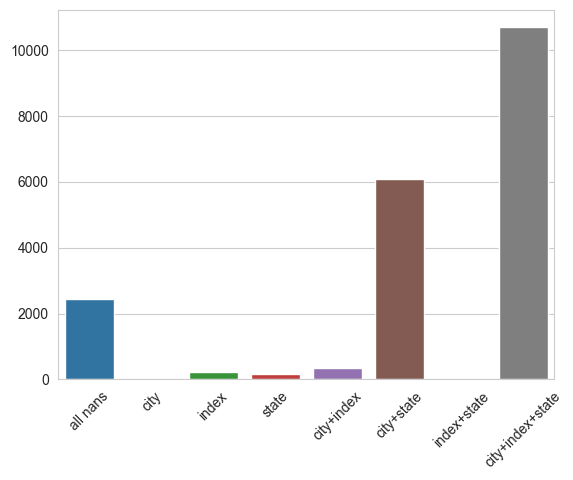

In [287]:
sns.barplot(x=names, y=cnts)
plt.xticks(rotation=45);

#### Обработка колонки salary

Выясните, какие форматы значений есть в столбце `salary`. Сделайте выводы. При необходимости – стройте графики.

In [288]:
def series_to_float(series):
    series = series.str.replace(',', '')
    return series.astype(float)

In [289]:
mask = monster_clear['salary'].notna()
salary = monster_clear.loc[mask, 'salary'].copy()
salary = salary.str.replace('$', '', regex=False)
salary

13                                     9.00 - 13.00  /hour
14                            80,000.00 - 95,000.00  /year
19                            60,000.00 - 72,000.00  /year
23                            Excellent Pay and Incentives
29                           70,000.00 - 100,000.00  /year
                               ...                        
21987                                     80,000.00+ /year
21995                  120,000.00 - 160,000.00  /yearbonus
21996                         45,000.00 - 60,000.00  /year
21998                                 25.00 - 28.00  /hour
21999    40,000.00 - 46,000.00  /year+ annual bonus (up...
Name: salary, Length: 3264, dtype: object

У вас должны получиться следующие форматы:
1. 10.00 - 20.00 &dollar; &sol;hour
2. 10,000.00 - 20,000.00 &dollar; &sol;year
3. &dollar;10.00 &sol;hour
4. &dollar;10,000.00+ &sol;year
5. Up to &dollar;20,000.00

##### Напишем регулярные выражения для всех типов

In [290]:
def check_and_print(name, matches, reg):
    print(f'{name}:')
    mistakes = list(filter(lambda x: not bool(re.search(reg, x)), matches))
    if mistakes:
        print(reg)
        for mistake in mistakes:
            print(mistake)

    else:
        print('no mistakes')

In [291]:
money_r = '\d+,?\d*\.\d{2}'
s_r = '\s*'
min_max= f'{s_r}-{s_r}'
dollar_or_spaces  = ''
time_interval_r = '\/[a-zA-Z]{4}'

interval_group =  f'(?P<interval>{time_interval_r})'

type_1_2 = fr'(?P<from>{money_r}){min_max}(?P<to>{money_r}){s_r}{interval_group}{s_r}'
type_3 = fr'(?P<from>{money_r}){s_r}{interval_group}{s_r}'
type_4 = fr'(?P<from>{money_r})\+{s_r}{interval_group}{s_r}'
type_5= fr'(?i)up{s_r}to{s_r}(?P<from>{money_r})'

without_date_interval = fr'^(?P<from>{money_r}){min_max}(?P<to>{money_r}){s_r}(?!{time_interval_r}){s_r}$'
without_date_single = fr'^(?P<from>{money_r}){s_r}(?!{time_interval_r}){s_r}$'

check_and_print('interval', ['9.00 - 13.00'], without_date_interval)
check_and_print('single', ['9.00'], without_date_single)





def tests():
    type_1_matches = ['10.00 - 20.00 $ /hour', '9.00 - 13.00  /hour', ]
    type_2_matches = ['10,000.00 - 20,000.00 $ /year']
    type_3_matches = ['$10.00 /hour']
    type_4_matches = ['$10,000.00+ /year']
    type_5_matches = ['Up to $20,000.00']

    to_check = [('type1', type_1_matches, type_1_2),
                ('type2', type_2_matches, type_1_2),
                ('type3', type_3_matches, type_3),
                ('type4', type_4_matches, type_4),
                ('type5', type_5_matches, type_5)]
    for name, matches, reg in to_check:

        matches = list(map(lambda x:x.replace('$', ''), matches))
        check_and_print(name, matches, reg)

tests()

interval:
no mistakes
single:
no mistakes
type1:
no mistakes
type2:
no mistakes
type3:
no mistakes
type4:
no mistakes
type5:
no mistakes


##### Отберем данные без интервала и разграничим дневную плату от годовой

In [292]:
tmp = salary.copy()
tmp = salary.str.extract(without_date_interval)
tmp = tmp.fillna(salary.str.extract(without_date_single))
values = series_to_float(tmp['from'].dropna())
values

2424     108887.00
9144         10.30
9437          9.00
10024        11.00
10322        10.21
17122     31054.00
17170        13.00
17523         8.00
17602        12.50
17637        12.50
17663         8.00
17972     40000.00
18123     31054.00
Name: from, dtype: float64

Так как данных такого типа мало, то удобнее посмотреть на них вблизи

Зар.плата больше 10000 будет считать зар.платой за год

##### Запишем данные в таблицу

Бонус - это все, что останется после сбора данных регулярками. В некотрых случаях туда могут попасть нерелевантные данные вроде "salary". Отбирать данные такого типа возможно только вручную или более сложными алгоритмами

In [293]:
monster_tmp = monster_clear.copy()
cols = ['from', 'to', 'interval', 'bonuses', 'offer_type']
for col in cols:
    monster_tmp[col] = None


regexs = [type_1_2, type_3, type_4, type_5]
offer_types = ['from_to', 'fixed', 'from',  'from']
bonuses = salary.copy()

for reg, offer_type in zip(regexs, offer_types):
    # Подготовим  extract и заполним na
    extract = salary.str.extract(reg)
    extract.dropna(inplace=True)
    extract['offer_type'] = offer_type
    monster_tmp.fillna(extract, inplace=True)
    indexes = extract.index
    bonuses = bonuses.str.replace(reg, '', regex=True)




regexs = [without_date_interval, without_date_single]
offer_types = ['from_to', 'fixed']


for reg, offer_type in zip(regexs, offer_types):
    # Подготовим  extract и заполним na
    extract = salary.str.extract(reg)
    extract.dropna(inplace=True)
    extract['offer_type'] = offer_type
    monster_tmp.fillna(extract, inplace=True)

    # Запишем интервал на основании числа
    mask = series_to_float(extract['from']) > 20000
    year_indexes = extract.index[mask].tolist()
    day_indexes = extract.index[~mask].tolist()
    monster_tmp.loc[year_indexes, 'interval'] = '\year'
    monster_tmp.loc[day_indexes, 'interval'] = '\day'
    bonuses = bonuses.str.replace(reg, '', regex=True)

# Добавим бонусы
bonuses = bonuses.replace(r'^\s*$', np.nan, regex=True)
bonuses.rename('bonuses', inplace=True)
monster_tmp.fillna(bonuses.to_frame(), inplace=True)

# Вывдеем результат
monster_tmp.loc[salary.index]

,job_description,job_title,job_type,location,organization,salary,sector,city,index,state,from,to,interval,bonuses,offer_type
13,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,"Houston, TX 77098",Education,9.00 - 13.00 $ /hour,Entry Level,Houston,77098,TX,9.00,13.00,/hour,NaN,from_to
14,Construction Professional For more than 15 yea...,Superintendent Job in Houston,Full Time Employee,"Houston, TX",Construction - Industrial Facilities and Infra...,"80,000.00 - 95,000.00 $ /year",Building Construction/Skilled Trades,Houston,NaN,TX,"80,000.00","95,000.00",/year,NaN,from_to
19,"Competitive compensation package, excellent co...",Technician - Robot & Multi-Axis CNC Field Serv...,Full Time,"Carter Lake, IA 51510",NaN,"60,000.00 - 72,000.00 $ /year",Experienced (Non-Manager),Carter Lake,51510,IA,"60,000.00","72,000.00",/year,NaN,from_to
23,"Well respected, rapidly growing, and expandin...",Estimator - Construction Job in Denver,Full Time,"Denver, CO 80215",NaN,Excellent Pay and Incentives,NaN,Denver,80215,CO,NaN,NaN,NaN,Excellent Pay and Incentives,NaN
29,Experis is working with a Pharmaceutical start...,Sr. Process Engineer,Full Time Employee,"Sr. Process Engineer, Manufacturing","Chicago, IL","70,000.00 - 100,000.00 $ /year",Engineering,NaN,NaN,NaN,"70,000.00","100,000.00",/year,NaN,from_to
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21987,Own Your TerritoryAsk yourself these questions...,Experienced Territory Sales,Full Time,"Chicago, IL 60602",NaN,"$80,000.00+ /year",Experienced (Non-Manager),Chicago,60602,IL,"80,000.00",NaN,/year,NaN,from
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN,Cincinnati,NaN,OH,"120,000.00","160,000.00",/year,bonus,from_to
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),Cincinnati,45236,OH,"45,000.00","60,000.00",/year,NaN,from_to
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,Chicago,60609,IL,25.00,28.00,/hour,NaN,from_to


In [294]:
monster_clear = monster_tmp

#### Обработка колонки job_type

Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [295]:
monster_clear['job_type']

0         Full Time Employee
1                  Full Time
2        Full Time, Employee
3                  Full Time
4         Full Time Employee
                ...         
21995              Full Time
21996              Full Time
21997              Full Time
21998     Full Time Employee
21999              Full Time
Name: job_type, Length: 19953, dtype: object

* Full Time<,><разное количество пробелов> Employee
* Full time<Пусто>
* Part time <,><разное количество пробелов> Employee
* Full Time Temporary/Contract/Project
* Temporary/Contract/Project

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [296]:
s_r = '\s*'
full_time_r = rf'(?i)full time'
part_time_r = rf'(?i)part time'
employee_r = rf'(?i)employee'
intern_r = rf'(?i)intern'

def get_employment_business(s):
    if re.search(full_time_r, s):
        return 'full'
    elif re.search(part_time_r, s):
        return 'partial'
    else:
        return None

def get_employment_type(s):
    if re.search(employee_r, s):
        return 'employee'
    elif re.search(intern_r, s):
        return 'intern'
    else:
        return None

Теперь видно, что тип работы состоит из двух частей: полноты занятости (Full Time, Part Time, ...) и типа занятости (Employee, Intern, ...). Встречаются неполные записи. Будем считать по умолчанию полноту занятости Full Time и тип занятости Employee и разделим эту колонку на две.

In [297]:
monster_tmp = monster_clear.copy()
monster_tmp['employment_business'] = None
monster_tmp['employment_type'] = None
jobs_without_na = monster_tmp.loc[monster_tmp['job_type'].notna(), 'job_type']

pairs = [(get_employment_type, 'employment_type'), (get_employment_business, 'employment_business')]
for func, col_name in pairs:
    parsed_data = jobs_without_na.apply(func)
    parsed_data.rename(col_name, inplace=True)
    monster_tmp.fillna(parsed_data.to_frame(), inplace=True)
monster_tmp[['job_type', 'employment_business', 'employment_type']]

,job_type,employment_business,employment_type
0,Full Time Employee,full,employee
1,Full Time,full,NaN
2,"Full Time, Employee",full,employee
3,Full Time,full,NaN
4,Full Time Employee,full,employee
...,...,...,...
21995,Full Time,full,NaN
21996,Full Time,full,NaN
21997,Full Time,full,NaN
21998,Full Time Employee,full,employee


In [298]:
monster_tmp

,job_description,job_title,job_type,location,organization,salary,sector,city,index,state,from,to,interval,bonuses,offer_type,employment_business,employment_type
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development,Madison,53702,WI,NaN,NaN,NaN,NaN,NaN,full,employee
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN,Madison,53708,WI,NaN,NaN,NaN,NaN,NaN,full,NaN
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,full,employee
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager),Dixon,NaN,CA,NaN,NaN,NaN,NaN,NaN,full,NaN
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management,Camphill,NaN,PA,NaN,NaN,NaN,NaN,NaN,full,employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN,Cincinnati,NaN,OH,"120,000.00","160,000.00",/year,bonus,from_to,full,NaN
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),Cincinnati,45236,OH,"45,000.00","60,000.00",/year,NaN,from_to,full,NaN
21997,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,NaN,NaN,Chicago,60602,IL,NaN,NaN,NaN,NaN,NaN,full,NaN
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,Chicago,60609,IL,25.00,28.00,/hour,NaN,from_to,full,employee


In [299]:
monster_tmp

,job_description,job_title,job_type,location,organization,salary,sector,city,index,state,from,to,interval,bonuses,offer_type,employment_business,employment_type
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development,Madison,53702,WI,NaN,NaN,NaN,NaN,NaN,full,employee
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN,Madison,53708,WI,NaN,NaN,NaN,NaN,NaN,full,NaN
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,full,employee
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager),Dixon,NaN,CA,NaN,NaN,NaN,NaN,NaN,full,NaN
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management,Camphill,NaN,PA,NaN,NaN,NaN,NaN,NaN,full,employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN,Cincinnati,NaN,OH,"120,000.00","160,000.00",/year,bonus,from_to,full,NaN
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),Cincinnati,45236,OH,"45,000.00","60,000.00",/year,NaN,from_to,full,NaN
21997,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,NaN,NaN,Chicago,60602,IL,NaN,NaN,NaN,NaN,NaN,full,NaN
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,Chicago,60609,IL,25.00,28.00,/hour,NaN,from_to,full,employee


In [300]:
monster_clear = monster_tmp

In [301]:
monster_clear

,job_description,job_title,job_type,location,organization,salary,sector,city,index,state,from,to,interval,bonuses,offer_type,employment_business,employment_type
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development,Madison,53702,WI,NaN,NaN,NaN,NaN,NaN,full,employee
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN,Madison,53708,WI,NaN,NaN,NaN,NaN,NaN,full,NaN
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,full,employee
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager),Dixon,NaN,CA,NaN,NaN,NaN,NaN,NaN,full,NaN
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management,Camphill,NaN,PA,NaN,NaN,NaN,NaN,NaN,full,employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN,Cincinnati,NaN,OH,"120,000.00","160,000.00",/year,bonus,from_to,full,NaN
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),Cincinnati,45236,OH,"45,000.00","60,000.00",/year,NaN,from_to,full,NaN
21997,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,NaN,NaN,Chicago,60602,IL,NaN,NaN,NaN,NaN,NaN,full,NaN
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,Chicago,60609,IL,25.00,28.00,/hour,NaN,from_to,full,employee


Колонку `job_description` оставим без изменения, так как она содержит текстовое описание вакансии.

### Столбцы job_title, organization, sector

Для столбцов `job_title`, `organization` и `sector` самостоятельно выявите и реализуйте этапы анализа.

#### job_title

In [302]:
monster_clear['job_title']

0                     IT Support Technician Job in Madison
1                  Business Reporter/Editor Job in Madison
2        Johnson & Johnson Family of Companies Job Appl...
3                          Engineer - Quality Job in Dixon
4             Shift Supervisor - Part-Time Job in Camphill
                               ...                        
21995    Assistant Vice President - Controller Job in C...
21996                         Accountant Job in Cincinnati
21997                      AEM/CQ developer Job in Chicago
21998    Electrician - Experienced Forging Electrician ...
21999             Contract Administrator Job in Cincinnati
Name: job_title, Length: 19953, dtype: object

In [303]:
"""
<job_title> job in <location>
<job_title> - <location> job in <location>
<job_title> job in <location> bullshit
<title>

Part-time job

"""

'\n<job_title> job in <location>\n<job_title> - <location> job in <location>\n<job_title> job in <location> bullshit\n<title>\n\nPart-time job\n\n'

- Можно получить город из названия. Полезно для location
- Job присутствует в большинстве записей. Можно удалить.
- Part-time

In [304]:
word_with_possible_dot = '[A-Za-z]+.?'
city = fr'"?{word_with_possible_dot}(?:\s*{word_with_possible_dot}){{0,2}}"?'

check_and_print('city',
                ['St. Louis',
                 '"Statewide"',
                 'Denver City'],
                city)

city:
no mistakes


In [305]:
s_r = '\s*'
job_in_city_regex = fr'(?i)^(?P<job_name>.*(?=job))job{s_r}in{s_r}(?P<job_city>{city}){s_r}$'

check_and_print('job_in_city_regex',
                ['Engineer - Quality Job in Dixon',
                 'Mailroom Clerk Job in Austin   ',
                 'West Central Delivery Lead Job in St. Louis ',
                 'Formulation Scientist Job in "Statewide"'],
                job_in_city_regex)

job_in_city_regex:
no mistakes


In [306]:
body_regex = fr'(?i){s_r}(?=body)body{s_r}(?={{){{.*'
check_and_print('body_regex',
                [' body { margin:px; overflow: visible !important; } #ejb_header { color: #; font-family: Verdana',
                 '    body { margin:ily: Verdana'],
                body_regex)

body_regex:
no mistakes


In [307]:
monster_regex = fr'(?i){s_r}\|{s_r}Monster\.com.*'


check_and_print('monster',
                ['| Monster.com function wrap(EL',
                 '| Monster.com var MONS_LOG_VARS = {"JobID":'],
                monster_regex)

monster:
no mistakes


In [308]:
hyphens_r = ''
job_dash_city_regex = fr'(?i)^(?P<job_name>.*(?={s_r}[\-–])){s_r}[\-–]{s_r}(?P<job_city>{city}){s_r}$'

check_and_print('job_dash_city',
                ['Asphalt Quality Control Manager -Houston',
                 'Mechanical/Machine Designer – Nashville'],
                job_dash_city_regex)

job_dash_city:
no mistakes


In [309]:
jaf_r = f'{s_r}Job Application for{s_r}'
job_application_for_regex = fr'(?i)^.*(?={jaf_r}){jaf_r}(?P<job_name>.*)$'

check_and_print('job_application_for_regex',
                ['Johnson & Johnson Family of Companies Job Application for Senior Training Leader',
                 'CyberCoders Job Application for Principal QA Engineer - Java'],
                job_application_for_regex)

job_application_for_regex:
no mistakes


In [310]:
job_colon_city_regex = fr'(?i)^(?P<job_name>.*(?={s_r}\:)){s_r}\:{s_r}(?P<job_city>{city}){s_r}$'
check_and_print('job colon city',
                ['Commercial Construction Superintendent: Denver'],
                job_colon_city_regex)

job colon city:
no mistakes


In [311]:
no_city_after_in_regex = fr'(?i)^(?P<job_name>.*(?=job))job{s_r}in{s_r}$'

check_and_print('no city after in',
                ['DESIGN ENGINEER Job in'],
                no_city_after_in_regex)

no city after in:
no mistakes


In [312]:
without_job_regex = fr'(?i)^(?P<job_name>.*(?=in))in{s_r}(?P<job_city>{city}){s_r}$'

check_and_print('without job regex',
                ['Van Drivers Wanted in Columbus'],
                without_job_regex)

without job regex:
no mistakes


##### Очистим столбец

In [313]:
monster_tmp = monster_clear.copy()

regexs = [monster_regex,
          body_regex,
          fr'(?i){s_r}Please apply only if you are qualified\.{s_r}',
          fr'(?i){s_r}monster{s_r}']
for reg in regexs:
    monster_tmp['job_title'] = monster_tmp['job_title'].str.replace(reg, '',
                                         regex=True)
monster_tmp['job_title'].replace('^\s*$', None, regex=True, inplace=True)
monster_tmp['job_title']

0                     IT Support Technician Job in Madison
1                  Business Reporter/Editor Job in Madison
2        Johnson & Johnson Family of Companies Job Appl...
3                          Engineer - Quality Job in Dixon
4             Shift Supervisor - Part-Time Job in Camphill
                               ...                        
21995    Assistant Vice President - Controller Job in C...
21996                         Accountant Job in Cincinnati
21997                      AEM/CQ developer Job in Chicago
21998    Electrician - Experienced Forging Electrician ...
21999             Contract Administrator Job in Cincinnati
Name: job_title, Length: 19953, dtype: object

In [314]:
def separate_to_cols(df,parsed_col, regexs, cols):
    df_tmp = df.copy()
    for col in cols:
        df_tmp[col] = None

    for reg in regexs:
        extract = df[parsed_col].str.extract(reg)
        extract.dropna(inplace=True)
        df_tmp.fillna(extract, inplace=True)
    return df_tmp

def get_invalid_rows_mask(df, cols):
    return df[cols].isna().all(axis=1)

In [315]:
job_cols = ['job_name', 'job_city']
job_regexs = [job_in_city_regex,
              job_dash_city_regex,
              job_application_for_regex,
              job_colon_city_regex,
              no_city_after_in_regex,
              without_job_regex ]
monster_tmp = separate_to_cols(monster_tmp, 'job_title', job_regexs, job_cols)
monster_tmp

,job_description,job_title,job_type,location,organization,salary,sector,city,index,state,from,to,interval,bonuses,offer_type,employment_business,employment_type,job_name,job_city
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development,Madison,53702,WI,NaN,NaN,NaN,NaN,NaN,full,employee,IT Support Technician,Madison
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN,Madison,53708,WI,NaN,NaN,NaN,NaN,NaN,full,NaN,Business Reporter/Editor,Madison
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,full,employee,Senior Training Leader,g Leader
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager),Dixon,NaN,CA,NaN,NaN,NaN,NaN,NaN,full,NaN,Engineer - Quality,Dixon
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management,Camphill,NaN,PA,NaN,NaN,NaN,NaN,NaN,full,employee,Shift Supervisor - Part-Time,Camphill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN,Cincinnati,NaN,OH,"120,000.00","160,000.00",/year,bonus,from_to,full,NaN,Assistant Vice President - Controller,Cincinnati
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),Cincinnati,45236,OH,"45,000.00","60,000.00",/year,NaN,from_to,full,NaN,Accountant,Cincinnati
21997,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,NaN,NaN,Chicago,60602,IL,NaN,NaN,NaN,NaN,NaN,full,NaN,AEM/CQ developer,Chicago
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,Chicago,60609,IL,25.00,28.00,/hour,NaN,from_to,full,employee,Electrician - Experienced Forging Electrician,Chicago


Посмотрим на работы, которые не попали под regex

In [316]:
non_na_job = monster_tmp[monster_tmp['job_title'].notna()]
invalid_mask = get_invalid_rows_mask(non_na_job, job_cols)

invalid_non_na = non_na_job.loc[invalid_mask, 'job_title']
invalid_non_na

28                      Resident Care Specialist
36                          RF System Technician
57                                    Specialist
98       Mechanical Engineer Relocate to Decatur
134                                   SOMMELIERS
                          ...                   
21788                         Major Gift Officer
21803                                      *Lead
21829                                   Director
21889                        Claims Appraiser II
21987                Experienced Territory Sales
Name: job_title, Length: 956, dtype: object

У нас остались 956 записей, которые не попали ни под один из критериев. Абсолютное большинство из них содержат информацию о названии должности, пусть и с небольшим количеством лишней информации.

Вывод: данные, не попавшие ни под одну из категорий запишем в `job_name`

In [317]:
monster_tmp['job_name'].fillna(invalid_non_na, inplace=True)

##### Заполним nan в поле city при помощи job_city

In [324]:
print(f"nans before: {monster_tmp['city'].isna().sum()}")

nans before: 2839


In [325]:
monster_tmp['city'].fillna(monster_tmp['job_city'], inplace=True)
print(f"nans after: {monster_tmp['city'].isna().sum()}")

nans after: 924


##### Запишем изменения

In [326]:
monster_clear = monster_tmp

In [327]:
monster_clear

,job_description,job_title,job_type,location,organization,salary,sector,city,index,state,from,to,interval,bonuses,offer_type,employment_business,employment_type,job_name,job_city
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development,Madison,53702,WI,NaN,NaN,NaN,NaN,NaN,full,employee,IT Support Technician,Madison
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN,Madison,53708,WI,NaN,NaN,NaN,NaN,NaN,full,NaN,Business Reporter/Editor,Madison
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN,g Leader,NaN,NaN,NaN,NaN,NaN,NaN,NaN,full,employee,Senior Training Leader,g Leader
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager),Dixon,NaN,CA,NaN,NaN,NaN,NaN,NaN,full,NaN,Engineer - Quality,Dixon
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management,Camphill,NaN,PA,NaN,NaN,NaN,NaN,NaN,full,employee,Shift Supervisor - Part-Time,Camphill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN,Cincinnati,NaN,OH,"120,000.00","160,000.00",/year,bonus,from_to,full,NaN,Assistant Vice President - Controller,Cincinnati
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),Cincinnati,45236,OH,"45,000.00","60,000.00",/year,NaN,from_to,full,NaN,Accountant,Cincinnati
21997,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,NaN,NaN,Chicago,60602,IL,NaN,NaN,NaN,NaN,NaN,full,NaN,AEM/CQ developer,Chicago
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,Chicago,60609,IL,25.00,28.00,/hour,NaN,from_to,full,employee,Electrician - Experienced Forging Electrician,Chicago


#### organization

In [330]:
monster_clear['organization'].isna().sum()

6389

In [332]:
monster_clear['organization'].nunique()

735

In [331]:
organization_not_na_mask = monster_clear['organization'].notna()

monster_clear.loc[organization_not_na_mask, 'organization']

1                               Printing and Publishing
2                       Personal and Household Services
3                                      Altec Industries
4                                                Retail
5                                  Computer/IT Services
                              ...                      
21984                              Other/Not Classified
21988                               Healthcare Services
21994                                               All
21996    Construction - Residential & Commercial/Office
21998                         Jernberg Industries, Inc.
Name: organization, Length: 13564, dtype: object

Что видим:

Много названий одного и того же:
* Computer/IT Services
* Computer Software

Перечисление через запятую:
* Computer Software, Computer/IT Services

Перечисление через двоеточие:
* Retail;Telecommunications Services;Advertising and PR Services

Однозначноопредляемые при помощи services:
* Legal Services
* Accounting and Auditing Services
* Engineering Services
* Personal and Household Services

Данные по городу и штату:
* Chicago, IL
* Oklahoma City, OK
* San Francisco, CA
* Durham, NC
* Houston, TX
* Chicago, IL 60661

Аналог Nan:
* Other/Not Classified

Все:
* All

Приписка other:
* Manufacturing - Other
* Business Services - Other




Что можно сделать:
* Получить информацию по location
* Заменить `Other/Not Classified` на Nan
* Создать новый логический столбец `multisector`, который будет отвечать на вопрос: "Ведет ли компания деятельность в разных секторах?"

### Краткая статистика очищенных данных

Проанализируйте результаты обработки данных. 
1. Сравните, что было до и после.
2. Определите, какие еще этапы можно было бы включить. Выберите один и реализуйте его. Если на ваш взгляд, текущего состояния достаточно, определите, какие задачи можно решать с помощью обработанного датасета и опишите этапы обработки, которые для них могут понадобиться.